In [3]:
from sklearn.datasets import load_iris
from sklearn.metrics import pairwise_distances, silhouette_score
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV

In [4]:
x,y = load_iris(return_X_y = True)

In [5]:
cl = KMeans(n_clusters = 3)

In [6]:
cl.fit(x)

KMeans(n_clusters=3)

In [7]:
labels = cl.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [8]:
score = silhouette_score(x, labels, metric = 'euclidean')

In [9]:
score

0.5528190123564091

In [10]:
cl.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [11]:
print(metrics.classification_report(y, labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



In [12]:
import matplotlib.pyplot as plt

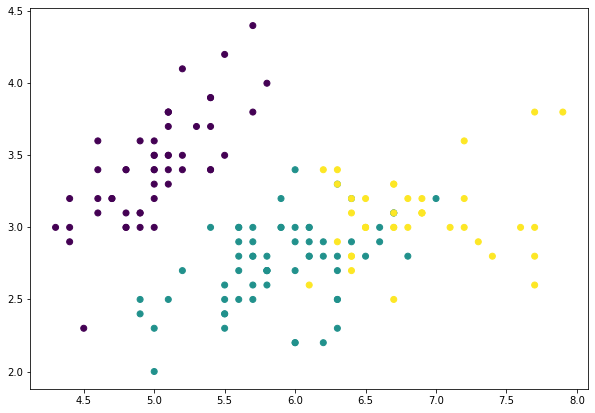

In [13]:
fig, ax = plt.subplots(figsize = (10,7))

ax.scatter(x[:,0],x[:,1], c = labels)

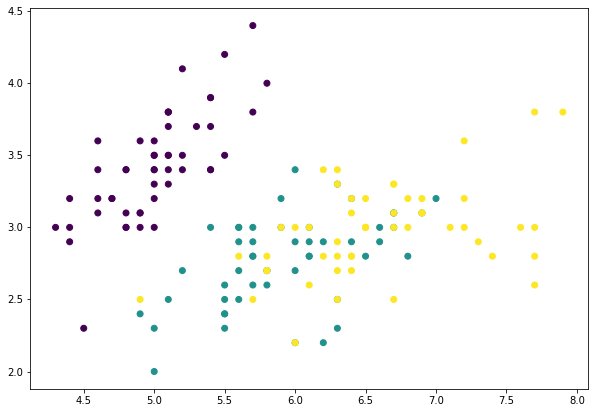

In [14]:
fig, ax = plt.subplots(figsize = (10,7))

ax.scatter(x[:,0],x[:,1], c = y)

In [15]:
gmm = GaussianMixture(n_components = 3, init_params = 'kmeans', covariance_type = 'full', )

In [16]:
gmm.fit(x)

GaussianMixture(n_components=3)

In [17]:
preds = gmm.predict(x)

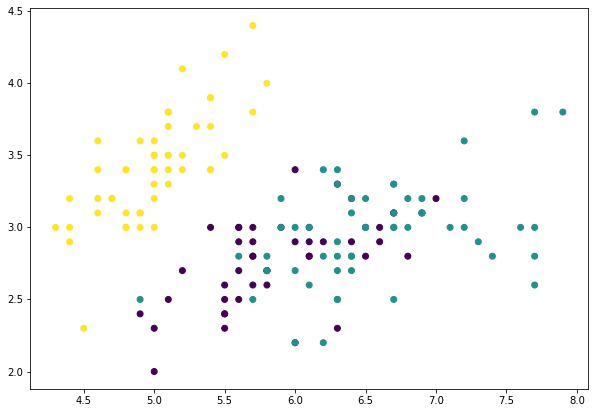

In [18]:
fig, ax = plt.subplots(figsize = (10,7))

ax.scatter(x[:,0],x[:,1], c = preds)

In [19]:
print(metrics.classification_report(preds, y))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        45
           1       0.10      0.09      0.10        55
           2       0.00      0.00      0.00        50

    accuracy                           0.03       150
   macro avg       0.03      0.03      0.03       150
weighted avg       0.04      0.03      0.03       150



In [22]:
import numpy as np

In [24]:
clusters = np.arange(2, 10)
clusters

array([2, 3, 4, 5, 6, 7, 8, 9])

In [26]:
params = {
    'n_clusters': clusters    
}

In [47]:
search = GridSearchCV(estimator = cl, param_grid = params, scoring = score, cv = 5, refit = True, return_train_score = True)

In [48]:
search.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [43]:
dir(search)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_validate_data',
 'classes_',
 'cv',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'n_features_in_',
 'n_jobs',
 'param_grid',
 'pre_dispatch',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'refit',
 'return_train_sco

In [44]:
search.scoring

0.5528190123564091

In [45]:
search.return_train_score

False

In [49]:
search.cv_results_

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'